In [4]:
from keras.models import model_from_json
import cv2, os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread

In [2]:
os.listdir('.')

['.git',
 '.gitignore',
 '.ipynb_checkpoints',
 '1) face_extraction.ipynb',
 '2) train.ipynb',
 '3) evaluate.ipynb',
 'data_cascaded',
 'data_collected_from_google',
 'model',
 'numpy',
 'README.md',
 'results',
 'SCUT-FBP5500_v2',
 'test_images',
 'xml']

In [9]:
img_height = 80
img_width = 80
img_channels = 3

labels = ['not_pretty', 'pretty']

In [3]:
# Loading the model
json_file = open("model/model.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
# load weights into new model
model.load_weights("model/model.h5")
print("Loaded model from disk")

Loaded model from disk


In [5]:
# Load the cascade
face_cascade = cv2.CascadeClassifier('xml/haarcascade_frontalface_default.xml')

In [6]:
def predict(img):
    img = cv2. resize(img, (img_width, img_height))
    img = img.reshape(1, img_width, img_height, 3)
    my_pred = np.argmax(model.predict(img))
    pred_class = labels[my_pred]
    return pred_class

In [15]:
def extract_n_predict(img_path):
    # Read the input image
    img = imread(img_path)
    plt.imshow(img)
    # Convert into grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Detect faces
    faces = face_cascade.detectMultiScale(gray, 1.3, 4)
    
    if faces is ():
        print("Sorry! Unable to detect face or it might contains filter")
    else:
        results = []
        # Draw rectangle around the faces
        for (x, y, w, h) in faces:
            img_crop = img[y:y+h, x:x+w]    
            cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
            my_pred = predict(img_crop)
            results.append(my_pred)
            plt.title(str(results))
        plt.imshow(img)

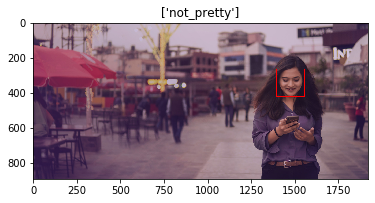

In [17]:
extract_n_predict('test_images/banner.jpg')

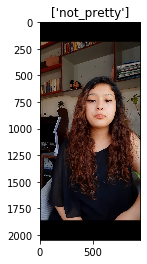

In [18]:
extract_n_predict('test_images/swas.jpg')

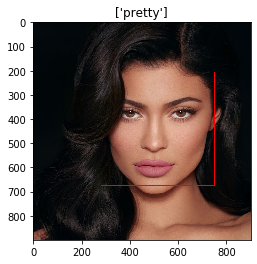

In [19]:
extract_n_predict('test_images/kylie.jpg')

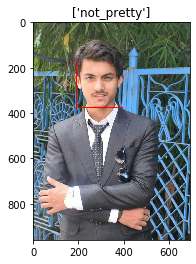

In [20]:
extract_n_predict('test_images/soyam.jpg')